In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.datasets import mnist
import seaborn as sns
import pandas as pd
import sys
from tqdm import tqdm
sys.path.append('../Deep_Learning/')
from DeepNeuralNetwork import DNN
from nn_optimization_methods import SGD
from layers.Dense import Dense
from layers.Input import Input
from layers.Softmax import Softmax
sys.path.append('../tools/')
import tools
import copy

%matplotlib inline

/home/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# AutoEncoder Example using DNN

## Demonstrated using mnist data

In [2]:
(X_train_digits, y_train), (X_test_digits, y_test) = mnist.load_data()

In [3]:
X_train = np.array(list(map(lambda x: x.flatten()/255,X_train_digits)))
X_test = np.array(list(map(lambda x: x.flatten()/255,X_test_digits)))

In [4]:
class AutoEncoder():
    """
    An auto encoder is a semi supervised learning algorithm that attempts to reconstruct input using a smaller feature space
    Parameters:
        X: numpy array(): data matrix
        encoder: DNN to reduce dimensions of matrix
        decoder: DNN to recreate the original data from the encoded data
        full_model: DNN that combines both the encoder and decoder objects, used to train both
    """
    def __init__(self,X):
        
        self.X = X
        self.encoder = None
        self.decoder = None
        self.full_model = DNN()
        self.full_model.add(Input(X))
        self.count = 0
        
    def create_encoder(self,layers=[Dense(32),Dense(512)],encoded_dims=2):
        
        self.count = 0
        for layer in layers:
            self.full_model.add(layer)
            self.count += 1
            
        self.full_model.add(Dense(encoded_dims))
        
    def create_decoder(self,layers=[Dense(32)]):
        
        if len(layers) > 0:
            for layer in layers:
                self.full_model.add(layer)
            
        self.full_model.add(Dense(self.X.shape[-1]))
    
    def finalize_encoder_decoder(self):
        
        count = 0
        layer = self.full_model.head.getNext()
        self.encoder = DNN()
        self.decoder = DNN()
        self.encoder.add(Input(self.X))
        
        while layer != None:
            print(layer)
            newlay = copy.deepcopy(layer)
            if count <= self.count:
                self.encoder.add(newlay)
                self.encoder.outlayer.update(newlay.getWeights())
                if count == a.count:
                    self.encoder.outlayer.next = None
                    self.decoder.add(Input(self.encoder.outlayer.output))

            else:
                self.decoder.add(newlay)
                self.decoder.outlayer.update(newlay.getWeights())
            layer = layer.getNext()
            count += 1
            
    def train(self,learning_rate=0.0001,epochs=100,loss="mse"):
        
        self.full_model.fit(self.X,self.X,lr=learning_rate,epochs=epochs,loss=loss)
        self.finalize_encoder_decoder()
    
    def predict(self,X):
        
        encoded = self.encoder.predict(X)
        decoded = self.decoder.predict(encoded)
        return encoded,decoded, self.full_model.predict(X)


In [5]:
a = AutoEncoder(X_train[:200])
a.create_encoder()
a.create_decoder()

[[0.14901965 0.84492062 0.49887636 0.74434196 0.31225788 0.18715236
  0.32454996 0.06693336 0.0762862  0.83913118 0.80076477 0.87991632
  0.82028012 0.87985192 0.4354582  0.31570469 0.32757859 0.30850491
  0.29940336 0.09161459 0.90377815 0.26497399 0.48417159 0.34970786
  0.47492708 0.10304024 0.05854851 0.48515971]
 [0.79833652 0.53672419 0.77188005 0.14734863 0.86494265 0.11957324
  0.3226748  0.46203911 0.0285066  0.09804953 0.34580868 0.9340963
  0.0870979  0.20413742 0.92452207 0.97604862 0.84150011 0.34396834
  0.02887576 0.65212054 0.4249368  0.18301199 0.24390323 0.87735205
  0.86508306 0.42763094 0.92520753 0.28142336]
 [0.39302366 0.18769433 0.89377549 0.14066157 0.849913   0.29808007
  0.3059536  0.1203445  0.81544165 0.45301079 0.31541426 0.2696239
  0.12729915 0.41253778 0.43602861 0.90739132 0.20063007 0.91209126
  0.78390451 0.39572761 0.53365817 0.76292486 0.26842082 0.43568368
  0.81756274 0.93402909 0.40463233 0.31076348]
 [0.62747795 0.74586549 0.13261361 0.91923833

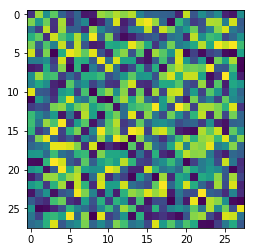

In [6]:
prediction = a.full_model.predict(X_train[0].reshape(1,784)).reshape(28,28)
print(prediction)
plt.imshow(prediction)

In [7]:
a.train(epochs=10000,learning_rate=0.001,loss="mse")

MSE 160.0744324532548:   0%|          | 5/10000 [00:03<2:09:37,  1.29it/s] 

KeyboardInterrupt: 

In [ ]:
a.decoder.forward(a.encoder.forward(X_train[0]))

In [ ]:
a.predict(X_train[0])[2]

In [ ]:
plt.imshow(a.predict(X_train[0])[2].reshape(28,28))

In [ ]:
plt.imshow(X_train[0].reshape(28,28))